In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tacherfaces/tatcherFaces.mat
/kaggle/input/resnet50/other/2/1/imagenet-vgg-verydeep-16.mat
/kaggle/input/resnet50/other/1/1/imagenet-resnet-50-dag.mat


# **SIMPLEN_TIDY**

In [43]:
# import numpy as np


# def vl_simplenn_tidy(net):
#     tnet = {'layers': [], 'meta': {}}

#     # copy meta information in net.meta subfield
#     if 'meta' in net:
#         tnet['meta'] = net['meta']

#     if 'classes' in net:
#         tnet['meta']['classes'] = net['classes']

#     if 'normalization' in net:
#         tnet['meta']['normalization'] = net['normalization']

#     # Adjust for the new version of vl_imreadjpeg
#     if isinstance(tnet, dict) and 'meta' in tnet:
#         meta = tnet['meta']
#         if isinstance(meta, dict) and 'normalization' in meta:
#             normalization = meta['normalization']
#             if isinstance(normalization, dict):
#                 if 'cropSize' not in normalization and \
#                         'border' in normalization and \
#                         'imageSize' in normalization:
#                     insz = normalization['imageSize'][:2]
#                     bigimSz = insz + normalization['border']
#                     normalization['cropSize'] = [x / bigimSz for x in insz]

#     # copy layers
#     # copy layers
#     for l, layer in enumerate(net['layers']):
#         defaults = {'name': f'layer{l}', 'precious': False}

#         # Ignore custom layers (e.g., for classes the `in` operator does not work)
#         # The only interface requirement for custom layers is forward and
#         # backward function.
#         if isinstance(layer, dict):  # Check if layer is a dictionary
#             # Ignore custom layers (e.g., for classes the `in` operator does not work)
#             # The only interface requirement for custom layers is forward and
#             # backward function.
#             if 'type' in layer and layer['type'] in {'conv', 'convt', 'bnorm'}:
#                 if 'weights' not in layer:
#                     layer['weights'] = [layer['filters'], layer['biases']]
#                     del layer['filters']
#                     del layer['biases']
#             if 'weights' not in layer:
#                 layer['weights'] = []

#             # Check that weights include moments in batch normalization.
#             if 'type' in layer and layer['type'] == 'bnorm':
#                 if len(layer['weights']) < 3:
#                     layer['weights'].append(np.zeros((layer['weights'][0].shape[0], 2), dtype=np.float32))

#             # Fill in missing values.
#             defaults_map = {
#                 'conv': {'pad': 0, 'stride': 1, 'dilate': 1, 'opts': {}},
#                 'pool': {'pad': 0, 'stride': 1, 'opts': {}},
#                 'convt': {'crop': 0, 'upsample': 1, 'numGroups': 1, 'opts': {}},
#                 'relu': {'leak': 0},
#                 'dropout': {'rate': 0.5},
#                 'normalize': {'param': [5, 1, 0.0001 / 5, 0.75]},
#                 'lrn': {'param': [5, 1, 0.0001 / 5, 0.75]},
#                 'pdist': {'noRoot': False, 'aggregate': False, 'p': 2, 'epsilon': 1e-3, 'instanceWeights': []},
#                 'bnorm': {'epsilon': 1e-5}
#             }
#             if 'type' in layer and layer['type'] in defaults_map:
#                 defaults = defaults_map[layer['type']]
#             for key, value in defaults.items():
#                 if key not in layer:
#                     layer[key] = value

#             # save back
#             tnet['layers'].append(layer)

#         return tnet



# **VL_SIMPLENN**

In [44]:
# import numpy as np
# import torch


# def vl_simplenn(net, x, dzdy=None, res=None, **kwargs):
#     opts = {
#         'conserveMemory': False,
#         'sync': False,
#         'mode': 'normal',
#         'accumulate': False,
#         'cudnn': True,
#         'backPropDepth': float('inf'),
#         'skipForward': False,
#         'parameterServer': None,
#         'holdOn': False
#     }
#     layers = net['layers']
#     print(layers,'*****')
#     for k, v in kwargs.items():
#         if k in opts:
#             opts[k] = v
            
#     for layer in net['layers']:
#         if layer['type'] == 'conv':
#             print('Con')
# #             x = torch.nn.functional.conv2d(res[-1], layer['weights'][0], layer['weights'][1],
# #                                            padding=layer['pad'], stride=layer['stride'], dilation=layer['dilate'])
#         elif layer['type'] == 'pool':
#             print('Pool')
# #             x = torch.nn.functional.max_pool2d(res[-1], layer['pool'], padding=layer['pad'],
# #                                                stride=layer['stride'])
#         elif layer['type'] == 'relu':
#             print('RELU')
# #             x = torch.nn.functional.relu(res[-1])

# #         res.append(x)
#     n = len(net['layers'])
# #     print(n,'Number of layers')

#     if dzdy is None:
#         doder = False
#         if opts['skipForward']:
#             raise ValueError('RES structure must be provided for `skipForward`.')
#     else:
#         doder = True

#     if opts['cudnn']:
#         cudnn = {'CuDNN'}
#         bnormCudnn = {'NoCuDNN'}
#     else:
#         cudnn = {'NoCuDNN'}
#         bnormCudnn = {'NoCuDNN'}

#     if opts['mode'] == 'normal':
#         testMode = False
#     elif opts['mode'] == 'test':
#         testMode = True
#     else:
#         raise ValueError('Unknown mode \'{}\'.'.format(opts['mode']))

#     gpuMode = isinstance(x, torch.Tensor)

#     if res is None and not opts['skipForward']:
#         res = [None] * (n + 1)
#         res[0] = {'x': x}

#     for i in range(n):
#         if opts['skipForward']:
#             break
#         print('Layer creation')
#         l = net['layers'][i]
#         res[i]['time'] = torch.cuda.Event(enable_timing=True)
#         res[i]['time'].record()
#         print('CONV')
#         if l['type'] == 'conv':
#             res[i + 1]['x'] = torch.nn.functional.conv2d(res[i]['x'], l['weights'][0], l['weights'][1],
#                                                          padding=l['pad'], stride=l['stride'], dilation=l['dilate'])

#         elif l['type'] == 'pool':
#             res[i + 1]['x'] = torch.nn.functional.max_pool2d(res[i]['x'], l['pool'], padding=l['pad'],
#                                                              stride=l['stride'])

#         elif l['type'] == 'relu':
#             res[i + 1]['x'] = torch.nn.functional.relu(res[i]['x'], inplace=False)

#         # Add more layer types as needed

#         # Optionally forget intermediate results
#         needsBProp = doder and i >= max(n - opts['backPropDepth'] + 1, 1)
#         forget = opts['conserveMemory'] and not needsBProp

#         if i > 0:
#             lp = net['layers'][i - 1]
#             forget = forget and (not needsBProp or (l['type'] == 'relu' and not lp['precious']))
#             forget = forget and (l['type'] != 'loss' and l['type'] != 'softmaxloss') and not lp['precious']

#         if forget:
#             res[i]['x'] = None

#         if gpuMode and opts['sync']:
#             torch.cuda.synchronize()

#         res[i]['time'].synchronize()
#         res[i]['time'] = res[i]['time'].elapsed_time()

#     if doder:
#         pass  # Implement backward pass here

#     return res


# **EXTRACT FEATURES**

In [45]:
# import numpy as np
# import torch
# from PIL import Image
# import scipy.io as sio


# def extract_features(stim, typ, dagg_flag):
# #     exec(open(run_path).read())
# #     dagg_flag=0
#     if dagg_flag == 0:
# #         typ = typ.split("/")[-1]
#         net_data = sio.loadmat(typ)
# #         key=net_data.keys()
# #         print(,'***********************************************************************')
#         net = vl_simplenn_tidy(net_data)
    
#         print(net['layers'],'****************************************************************************')
#         nimages = len(stim)
#         print(stim)
#         # print(f"nimages is {nimages}")
#         features = []
# #         Src = net['meta'][0][0]['normalization'][0][0]['imageSize'][0]
# #         rgb_values = net['meta'][0][0]['normalization'][0][0]['averageImage'][0][0]
# #         print(rgb_values)
# #         average_image = np.ones((Src[0], Src[1], 3))
# #         print(average_image.shape)
#         # print(stim[0][2][3].shape, " is the shape")
# #         for ind in range(3):
# #             average_image[:, :, ind] = rgb_values[ind]
#         for i in range(nimages):
#             img_pixel = stim[i][0]
# #             print(img_pixel.shape, " img")
#             # for j in range(4):

#                 # Reshape the flat array to the desired shape, if needed
#                 # reshape_stim = flat_stim.reshape((desired_shape))

#                 # Convert to a NumPy array
#             bimage_ip = np.array(img_pixel)
# #             print(bimage_ip.shape)
#             if len(bimage_ip.shape) < 3 or bimage_ip.shape[2] == 1:
#                 bimage_ip = np.repeat(bimage_ip[:, :, np.newaxis], repeats=3, axis=2)
# #             print(bimage_ip.shape)
#             cimage = np.array(Image.fromarray(bimage_ip).resize((Src[1], Src[0])))
#             cimage = cimage - average_image
#             cimage = torch.tensor(cimage.transpose(2, 0, 1)).float()
#             feature = vl_simplenn(net, cimage)
# #             print(len(feature),'Feature Shape')
#             features.append(feature)
# #             print(feature,'features***************************************')
#         return features

#     elif dagg_flag == 1:
# #         typ = typ.split("/")[-1]
#         net = sio.loadmat(typ)
#         net['mode'] = 'test'
#         print(net.keys())
#         nimages = len(stim)
#         Src = net['meta'][0][0]['normalization'][0][0]['imageSize'][0]
#         features = []
#         net['conserveMemory'] = False
#         nL = len(net['layers']) - 1
#         for i in range(nimages):
#             img_pixel = stim[i][0]
#             bimage_ip = np.array(img_pixel)
#             print("success")
#             cimage = np.array(Image.fromarray(bimage_ip).resize((Src[1], Src[0])))
#             print("success2")
#             print(cimage.shape,'cimage shape')
#             temp=net['meta'][0][0]['normalization'][0][0]['averageImage'][0][0]
#             print(temp.shape,'temp shape')
#             cimage = cimage - temp
#             cimage = torch.tensor(cimage.transpose(2, 0, 1)).float()
#             print(net)
#             net.eval({'data': cimage})
#             scores = []
#             for L in range(nL):
#                 scores.append(net.vars[L].value.view(-1).numpy())
#             features.append(scores)
#         return features

# **LAYERWISE_NON_VGG**

In [46]:
# import matplotlib.pyplot as plt
# import numpy as np


# def layerwise_mi_nonVGGfigures(mean_data, sem_data, file_name, reference_mi=None, reference_name=None, legend_name=None,
#                                y_label=None, shaded_region_name='Human Perception', y_limits=(-1, 1)):
#     if y_label is None:
#         y_label = 'XXX'

#     if reference_mi is not None:
#         if isinstance(reference_mi, (int, float)):
#             reference_mi = [reference_mi]
#         if isinstance(reference_name, str):
#             reference_name = [reference_name]

#     fig, ax = plt.subplots(figsize=(6.4, 4))

#     # Drawing the human perception rectangle
#     rect_color = (0.8, 0.8, 0.8)
#     rect = plt.Rectangle((1, y_limits[0]), len(mean_data[0]), y_limits[1] - y_limits[0], facecolor=rect_color,
#                          edgecolor='none')
#     ax.add_patch(rect)

#     # Plotting the data
#     line_colors = plt.cm.get_cmap('tab10', len(mean_data))
#     marker_size = 1
#     layer_ind = np.arange(1, len(mean_data[0]) + 1)

#     for ind, data in enumerate(mean_data):
#         if sem_data is not None:
#             plt.errorbar(layer_ind, data, yerr=sem_data[ind], fmt='o-', color=line_colors(ind),
#                          markerfacecolor=line_colors(ind), linewidth=0.5, markersize=marker_size, capsize=3)
#         else:
#             plt.plot(layer_ind, data, 'o-', color=line_colors(ind), markerfacecolor=line_colors(ind), linewidth=0.5,
#                      markersize=marker_size)

#     # Visual search modulation index
#     if reference_mi is not None:
#         for i, mi in enumerate(reference_mi):
#             ax.axhline(y=mi, linestyle='--', color='black', linewidth=0.5)
#             if reference_name is not None:
#                 ax.text(2, mi + 0.1, reference_name[i], fontsize=6)

#     # Naming the shaded region
#     ax.text(3, 0.9, shaded_region_name, fontsize=6)

#     # Correcting the plot
#     ax.set_xlim(1, len(mean_data[0]))
#     ax.set_ylim(y_limits)
#     ax.set_xticks([1, len(mean_data[0])])
#     ax.set_xticklabels([1, len(mean_data[0])])
#     ax.set_yticks([y_limits[0], 0, y_limits[1]])
#     ax.set_yticklabels([y_limits[0], 0, y_limits[1]])
#     ax.set_xlabel('VGG-16, layers')
#     ax.set_ylabel(y_label)

#     # Legends
#     if legend_name is not None:
#         ax.legend(legend_name, fontsize=6, loc='best', frameon=False)

#     plt.tight_layout()
#     plt.savefig(file_name + '.pdf')
#     plt.close()


# **NEW_VL_SIMPLENN**

In [10]:
import torch
import torch.nn.functional as F
import torch.nn as nn

def vl_simplenn(net, x, res=None):

#     print(x)
    n=len(net.features) + len(net.classifier)
#     print("LEn:",n)
    if (res is None):
        res = [{'x': None} for _ in range(n + 1)]

    res[0]['x'] = x
    i=0
    for (name, layer) in net.named_children():
        
        for  (sub_name, sub_layer) in (layer.named_children()):
#             print("Iteration:",i)
#             print(sub_layer)
            ltype=sub_layer.__class__.__name__
#             print(f"  Type: {sub_layer.__class__.__name__}")





    # res[i]['time'] = time.time()
            if ltype == 'Conv2d':
#                 print(res[i]['x'].shape,sub_layer.weight.shape,sub_layer.bias.shape)
                res[i + 1]['x'] = F.conv2d(res[i]['x'], sub_layer.weight,sub_layer.bias,
                            padding=sub_layer.padding, stride=sub_layer.stride, dilation=sub_layer.dilation)

            elif ltype == 'MaxPool2d':
                res[i + 1]['x'] = F.max_pool2d(res[i]['x'],
                            padding=sub_layer.padding, stride=sub_layer.stride,kernel_size=sub_layer.kernel_size)
            elif ltype=='Linear':
                linear_layer = nn.Linear(res[i]['x'].flatten().shape[0], 4096)
                output_tensor = linear_layer(res[i]['x'].flatten())
                res[i + 1]['x'] = output_tensor.to(torch.float32)
#                 temp= nn.Linear(res[i]['x'].flatten().shape[0], 4096)
#                 res[i + 1]['x'] = torch.tensor(temp),dtype=torch.float32
            elif ltype=='Dropout':
                i=i-1
#                 dropout_layer = CustomDropout(p=0.5)
#                 print(dropout_layer)
#                 res[i + 1]['x'] = dropout_layer
            elif ltype== 'ReLU':
                # if l['leak'] > 0:
                #     leak = {'leak': l['leak']}
                # else:
                leak = {}

                if res[i]['x'] is not None:
                    res[i + 1]['x'] = F.relu(res[i]['x'], **leak)
                else:
                    res[i + 1]['x'] = F.relu(res[i + 1]['x'], **leak)
            i+=1



    return res


# **NEW_EXTRACT_FEATURE**

In [11]:
import numpy as np
nl=37
thatcherIndex1 = np.zeros((20, nl))

In [12]:
import numpy as np
nl=37
thatcherIndex2 = np.zeros((20, nl))

# **CHECK THACHER EFFECT**

In [13]:
import numpy as np

def CheckThatcherEffect(features,i):

    for L in range(nl-1):
        v1 = features[0][L]['x']  # Access feature data for image ind, layer 1
        v2 = features[1][L]['x']  # Access feature data for image ind, layer 2
        v3 = features[2][L]['x']  # Access feature data for image ind, layer 3
        v4 = features[3][L]['x']  # Access feature data for image ind, layer 4
#         print('v1:',v1)
        # Calculate Euclidean norms
        v12 = np.linalg.norm(v1.detach().numpy() - v2.detach().numpy())
        v34 = np.linalg.norm(v3.detach().numpy() - v4.detach().numpy())

        thatcherIndex1[i, L] = (v12 - v34) / (v12 + v34)

#     return thatcherIndex

# Example usage:
# Assuming features is a list of dictionaries/tensors for each image and each layer
# features = [img1_layer1, img1_layer2, img2_layer1, img2_layer2, ...]
# where each img*_layer* is a dictionary/tensor containing 'x' key for feature map

# thatcherIndex = CheckThatcherEffect(features)
# print(thatcherIndex)


In [9]:
import numpy as np

def CheckThatcherEffect(features,i):

    for L in range(nl-1):
        v1 = features[0][L]['x']  # Access feature data for image ind, layer 1
        v2 = features[1][L]['x']  # Access feature data for image ind, layer 2
        v3 = features[2][L]['x']  # Access feature data for image ind, layer 3
        v4 = features[3][L]['x']  # Access feature data for image ind, layer 4
#         print('v1:',v1)
        # Calculate Euclidean norms
        v12 = np.linalg.norm(v1.detach().numpy() - v2.detach().numpy())
        v34 = np.linalg.norm(v3.detach().numpy() - v4.detach().numpy())

        thatcherIndex2[i, L] = (v12 - v34) / (v12 + v34)

#     return thatcherIndex

# Example usage:
# Assuming features is a list of dictionaries/tensors for each image and each layer
# features = [img1_layer1, img1_layer2, img2_layer1, img2_layer2, ...]
# where each img*_layer* is a dictionary/tensor containing 'x' key for feature map

# thatcherIndex = CheckThatcherEffect(features)
# print(thatcherIndex)


In [28]:
import torch
import torchvision.transforms as transforms
from torchvision.models import vgg16
from PIL import Image
import numpy as np

def extract_features(stim_data, types, dagg_flag):
    # Load the VGG16 model
    model1 = vgg16(pretrained=True)
    model1.eval()  # Set the model to evaluation mode
    model2=vgg16(pretrained=False)
    model2.eval()
    # Define the preprocessing transformations
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    # Extract the image data from the loaded dictionary
    # stim_images = stim_data['stim'][0]
#     print(stim_data['stim'])

    nimages =  len(stim_data)
    if dagg_flag==0:
        features1=  []
        features2=[]
        i=0
        for ind in range(nimages):
            print("Image:",ind)
            # Convert the numpy array to PIL Image
            image_array = stim_data[ind][0]
            if len(image_array.shape) < 3:
                image_array = np.stack((image_array,) * 3, axis=-1)
            image = Image.fromarray(image_array)

        # Preprocess and normalize the image
            image_tensor = preprocess(image).unsqueeze(0)
                # Perform inference using the model
#             with torch.no_grad():
#                 output = model(image_tensor)

           # Append the features to the list
            features1.append(vl_simplenn(model1, image_tensor))
            features2.append(vl_simplenn(model2, image_tensor))
            if ind%4==3:
                print('Calculating CheckThatcherEffect of 4 images')
                CheckThatcherEffect(features1,i)
                CheckThatcherEffect(features2,i)
                i=i+1
                features1=[]
                features2=[]
#         return features1,features2


In [29]:
import numpy as np

def nansem(data, axis=None):
    """
    Calculate the standard error of the mean (SEM) for arrays with NaN values.
    
    Parameters:
    - data: Input array
    - axis: Axis along which to compute SEM (default is None, which computes SEM for the flattened array)
    
    Returns:
    - SEM: Standard error of the mean
    """
    std = np.nanstd(data, axis=axis, ddof=1)  # Calculate standard deviation ignoring NaN values
    n = np.sum(~np.isnan(data), axis=axis)  # Count non-NaN elements along the axis
    SEM = std / np.sqrt(n)  # Calculate SEM
    return SEM

# Now you can use nansem instead of np.nansem in your code
# layerwise_mi_figures(np.nanmean(thatcherIndex, axis=0), nansem(thatcherIndex, axis=0), saving_file_name, reference_mi, reference_name, dist_types, y_label)


# **LAYERWISE_MI_FIGURE**

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D


def layerwise_mi_figures(mean_data, sem_data, file_name, reference_mi=None, reference_name=None, legend_name=None,
                         y_label=None, shaded_region_name='Human perception', y_limits=None):
    if y_limits is None:
        y_limits = [-1, 1]

    plt.figure(figsize=(7, 4))

    # Drawing the human perception rectangle
    plt.gca().add_patch(Rectangle((1, 0), 37, 1, facecolor=[0.8, 0.8, 0.8], edgecolor='none'))

    # Naming the layers by drawing the bottom rectangles
    layer_grouping = np.array([[1, 6.45], [6.55, 11.45], [11.55, 18.45], [18.55, 25.45], [25.55, 32.45], [32.55, 37]])
    layer_colour = np.vstack([np.tile([0.8, 0.8, 0.8], (5, 1)), [0.5, 0.5, 0.5]])
    box_width = 0.2 / (y_limits[1] - y_limits[0])

    for ind, (start, end) in enumerate(layer_grouping):
        plt.gca().add_patch(
            Rectangle((start, y_limits[0]), end - start, box_width, facecolor=layer_colour[ind], edgecolor='none'))
        plt.text(start + 0.4, y_limits[0] + box_width / 2, ['conv-1', 'conv-2', 'conv-3', 'conv-4', 'conv-5', 'fc'][ind], color='k', fontsize=6)

    # Plotting the data
    line_colour = plt.cm.get_cmap('tab10')
    marker_size = 2
    layer_ind = np.arange(1, 38)
    # print(mean_data)
    # print(np.array(mean_data).shape)
    mean_data = np.array(mean_data)
    for ind in range(mean_data.shape[0]):
        if sem_data is not None and not np.all(np.isnan(sem_data)):
            shadedErrorBar(layer_ind, mean_data[ind], sem_data[ind], lineprops=['-', {'markerfacecolor': line_colour(ind), 'color': line_colour(ind), 'linewidth': 0.5}], transparent=True, patchSaturation=0.3)
        else:
            plt.plot(layer_ind, mean_data[ind], '-', markerfacecolor=line_colour(ind), color=line_colour(ind), linewidth=0.5)

        plt.plot(layer_ind[1:14:2], mean_data[ind, 1:14:2], 'o', markersize=marker_size,
                 markeredgecolor=line_colour(ind))
        plt.plot(layer_ind[2:15:2], mean_data[ind, 2:15:2], 'o', markersize=marker_size,
                 markeredgecolor=line_colour(ind), markerfacecolor=line_colour(ind))
        plt.plot(layer_ind[5:16:3], mean_data[ind, 5:16:3], 'd', markersize=marker_size,
                 markeredgecolor=line_colour(ind), markerfacecolor=line_colour(ind))
        plt.plot(layer_ind[32:], mean_data[ind, 32:], 's', markersize=marker_size, markeredgecolor=line_colour(ind))

    # Visual search modulation index
    if reference_mi is not None:
        if isinstance(reference_mi, (list, np.ndarray)):
            for i, mi in enumerate(reference_mi):
                plt.plot([1, 37], [mi, mi], '--', color='k', linewidth=0.5)
                plt.text(2, mi + 0.1, reference_name[i], fontsize=6)
        else:
            plt.plot([1, 37], [reference_mi, reference_mi], '--', color='k', linewidth=0.5)
            plt.text(2, reference_mi + 0.1, reference_name, fontsize=6)

    # Naming the shaded region
    plt.text(3, 0.9, shaded_region_name, fontsize=6)

    plt.xlim(0.5, 37.5)
    plt.ylim(y_limits)
    plt.xticks(range(1, 38))
    plt.yticks(np.linspace(y_limits[0], y_limits[1], 5))

    plt.xlabel('VGG-16 layers')
    plt.ylabel(y_label)

    if legend_name is not None:
        handles, labels = plt.gca().get_legend_handles_labels()
        plt.legend(handles, labels, fontsize=6, loc='best', bbox_to_anchor=(1, 1), frameon=False)

    plt.tight_layout()
  #  plt.savefig(file_name + '.pdf')
    plt.show()

# **MAIN CODE**

In [32]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.io


# Main Code Directory location and SLASH of the OS
def get_expmainfolder_slash():
    main_folder = '..'
    SLASH = os.sep
    return main_folder, SLASH

# Adding Path
def add_paths(main_folder):
    SLASH = os.sep
    os.path.join(main_folder, 'dependencies', SLASH, 'matconvnet-1.0-beta24')
    os.path.join(main_folder, 'dependencies', SLASH, 'models')
    os.path.join(main_folder, 'dependencies', SLASH, 'lib')
    run_path = os.path.join(main_folder, 'dependencies', SLASH, 'matconvnet-1.0-beta24', SLASH, 'matlab', SLASH, 'vl_setupnn')
    return run_path

# STIM
def preprocess_stim(stim):
    S = 50
    for i in range(len(stim)):
        x = stim[i][0]
#         print(x,x.shape)
        stim[i][0] = x[S:x.shape[0]-S, :]
    return stim

# Networks
# network_types = ['imagenet-vgg-verydeep-16', 'imagenet-matconvnet-vgg-verydeep-16.mat', 'imagenet-vgg-verydeep-16_randn.mat',
#                 'imagenet-vgg-face', 'imagenet-caffe-alex', 'imagenet-googlenet-dag', 'imagenet-resnet-50-dag', 'imagenet-resnet-152-dag']
# dagg_flags = [0, 0, 0, 0, 0, 0, 1, 1]
# network_short_names = ['VGG-16', 'mat.VGG-16', 'VGG-16 randn', 'VGG-face', 'Alexnet', 'Goolgenet', 'ResNet 50', 'ResNet 152']
network_types = ['/kaggle/input/resnet50/other/2/1/imagenet-vgg-verydeep-16.mat']
dagg_flags = [0]
network_short_names = ['VGG-face']



# Effect Reference Level
reference_mi = (4.89 - 2.92) / (4.89 + 2.92)  # Table-2, Bartlet and Searcy, 1993
reference_name = 'Bartlet and Searcy, 1993'
MI_across_layers = [None] * len(network_types)
# Main Code
def main():
#     main_folder, SLASH = get_expmainfolder_slash()
#     run_path = add_paths(main_folder)

    # Load Stimuli
    stim_file_name = '/kaggle/input/tacherfaces/tatcherFaces.mat'
    stim = scipy.io.loadmat(stim_file_name)['stim']
    print('stim1',len(stim))
    stim = preprocess_stim(stim)
#     stim=stim[50:len(stim)-50]
    print('stim2',len(stim))
#     for a in stim:
#         print(a[0].shape,a[0])
#     print(np.array(stim.shape),stim)
    
#     
    
    time_taken = [None] * len(network_types)
#     MI_across_layers = [None] * len(network_types)

    for iter in range(len(network_types)):
        print(f'\n Network- {network_types[iter]} \n')
        print('\n Extracting Features\n')
        print('No of images;',len(stim))
        extract_features(stim, network_types[iter], dagg_flags[iter])
#         nL = len(features[0]) - 1
#         print('\n Checking thatcherization\n')
# #         print(len(features),'feature')
#         thatcherIndex = CheckThatcherEffect(features)
#         print(thatcherIndex,'Thacjer effect')
        MI_across_layers[iter] = thatcherIndex

        dist_types = 'Euclidean'
        y_label = 'Thatcher Index'
#         saving_file_name = os.path.join('..', SLASH, 'results', SLASH, f'Exp01-TI,net = {network_short_names[iter]} metric = {dist_types}')
        saving_file_name = f'results/{f"Exp01-TI_net_{network_short_names[iter]}_metric_{dist_types}"}'
        print(saving_file_name)
        # Effect Reference Level
        thacherIndex=[]
        thacherIndex.append(thatcherIndex1)
        thacherIndex.append(thatcherIndex2)
# if iter <= 3:  # Layer-wise plot for VGG-Network
#             layerwise_mi_figures(np.nanmean(thatcherIndex, axis=0), nansem(thatcherIndex, axis=0), saving_file_name, reference_mi, reference_name, dist_types, y_label)
#         else:  # Layer-wise plot for other networks
#             layerwise_mi_nonVGGfigures(np.nanmean(thatcherIndex, axis=0), nansem(thatcherIndex, axis=0), saving_file_name, reference_mi, reference_name, dist_types, y_label)
    
#     print('Now Plot')
#     sel_index = [0, 2, 3]
#     N = len(sel_index)
#     mean_data = np.zeros((N, 37))
# #     print(mean_data.shape)
#     sem_data = np.zeros((N, 37))
#     for ind in range(N):
#         print(len(MI_across_layers),MI_across_layers[0],'MIT Index')
#         a=np.nanmean(MI_across_layers[sel_index[ind]], axis=0)
#         print(a)
#         mean_data[ind, :] = np.nanmean(MI_across_layers[sel_index[ind]], axis=0)
#         sem_data[ind, :] = np.nansem(MI_across_layers[sel_index[ind]], axis=0)
#     file_name = os.path.join('..', SLASH, 'results', SLASH, 'Exp01_mainfigure_VGG16_variants')
#     layerwise_mi_figures(mean_data, sem_data, file_name, reference_mi, reference_name, [network_short_names[i] for i in sel_index], 'Thatcher Index')
#     print('New result')
#     sel_index = [0, 1]
#     N = len(sel_index)
#     mean_data = np.zeros((N, 37))
#     sem_data = np.zeros((N, 37))
#     for ind in range(N):
#         mean_data[ind, :] = np.nanmean(MI_across_layers[sel_index[ind]], axis=0)
#         sem_data[ind, :] = np.nansem(MI_across_layers[sel_index[ind]], axis=0)
# #     file_name = os.path.join('..', SLASH, 'results', SLASH, 'Exp01_suppfigure_comparing VGG16 with matconvnet VGG16')
#     layerwise_mi_figures(mean_data, sem_data, 'file_name', reference_mi, reference_name, [network_short_names[i] for i in sel_index], 'Thatcher Index')

if __name__ == '__main__':
    main()



stim1 80
stim2 80

 Network- /kaggle/input/resnet50/other/2/1/imagenet-vgg-verydeep-16.mat 


 Extracting Features

No of images; 80
Image: 0
Image: 1
Image: 2
Image: 3
Calculating CheckThatcherEffect of 4 images
Image: 4
Image: 5
Image: 6
Image: 7
Calculating CheckThatcherEffect of 4 images
Image: 8
Image: 9
Image: 10
Image: 11
Calculating CheckThatcherEffect of 4 images
Image: 12
Image: 13
Image: 14
Image: 15
Calculating CheckThatcherEffect of 4 images
Image: 16
Image: 17
Image: 18
Image: 19
Calculating CheckThatcherEffect of 4 images
Image: 20
Image: 21
Image: 22
Image: 23
Calculating CheckThatcherEffect of 4 images
Image: 24
Image: 25
Image: 26
Image: 27
Calculating CheckThatcherEffect of 4 images
Image: 28
Image: 29
Image: 30
Image: 31
Calculating CheckThatcherEffect of 4 images
Image: 32
Image: 33
Image: 34
Image: 35
Calculating CheckThatcherEffect of 4 images
Image: 36
Image: 37
Image: 38
Image: 39
Calculating CheckThatcherEffect of 4 images
Image: 40
Image: 41
Image: 42
Image: 

/tmp/ipykernel_32/1456367342.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  line_colour = plt.cm.get_cmap('tab10')


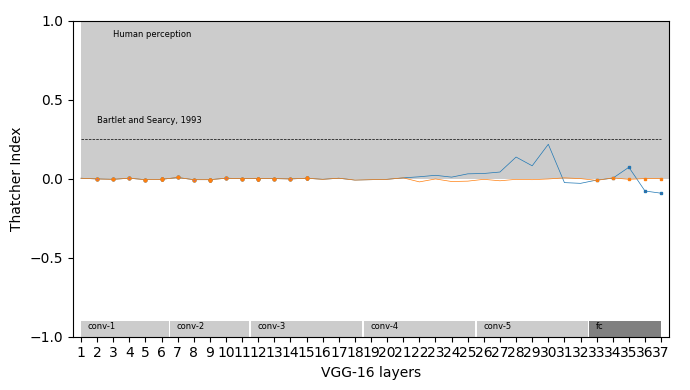

In [5]:
reference_mi = (4.89 - 2.92) / (4.89 + 2.92)  # Table-2, Bartlet and Searcy, 1993
reference_name = 'Bartlet and Searcy, 1993'
dist_types = 'Euclidean'
y_label = 'Thatcher Index'
layerwise_mi_figures(nanmean(thatcherIndex), [], 'saving_file_name', reference_mi, reference_name, dist_types, y_label)

# **AGE PREDICTION**